# Blood Glucose Control - EDA

**Name:** Edson Kenzo Takei


### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [1]:
import os
import pandas as pd


folder_path = "...\\gluroo"


combined_df = pd.DataFrame()


for file_name in os.listdir(folder_path):
    
    if file_name.startswith('gluroo_') and file_name.endswith('.csv'):  
        file_number = file_name.split('_')[1].split('.')[0]
        
       
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)  
        df['ID'] = file_number
        
        
        combined_df = pd.concat([combined_df, df], ignore_index=True)


combined_df.to_csv('combined_output.csv', index=False)

In [2]:
#Checking missing values as it is important to determine the usability of the data 
missing_percentage = combined_df.isnull().mean() * 100

# Print the column name and missing percentage
for col, perc in missing_percentage.items():
    print(f"Column: {col}, Missing Percentage: {perc:.2f}%")

Column: date, Missing Percentage: 0.00%
Column: sender_id, Missing Percentage: 96.14%
Column: bgl, Missing Percentage: 0.54%
Column: bgl_date_millis, Missing Percentage: 96.21%
Column: text, Missing Percentage: 96.17%
Column: template, Missing Percentage: 99.81%
Column: msg_type, Missing Percentage: 96.14%
Column: affects_fob, Missing Percentage: 96.14%
Column: affects_iob, Missing Percentage: 96.14%
Column: dose_units, Missing Percentage: 98.14%
Column: food_g, Missing Percentage: 98.32%
Column: food_glycemic_index, Missing Percentage: 98.34%
Column: dose_automatic, Missing Percentage: 96.14%
Column: fp_bgl, Missing Percentage: 99.95%
Column: message_basal_change, Missing Percentage: 100.00%
Column: __typename, Missing Percentage: 0.47%
Column: trend, Missing Percentage: 4.33%
Column: ID, Missing Percentage: 0.00%


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

In [3]:
# Checking unique values in msg_type as these can be useful informations in future analysis
def print_unique_values(df, column_name):
    if column_name in df.columns:
        unique_values = df[column_name].unique()
        print(f"Unique values in column '{column_name}':")
        print(", ".join(map(str, unique_values)))
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")

print_unique_values(combined_df, 'msg_type')

Unique values in column 'msg_type':
nan, DOSE_INSULIN, ANNOUNCE_MEAL, INTERVENTION_SNACK, DOSE_BASAL_INSULIN, BGL_FP_READING_CGM_CALIBRATION, NEW_TRANSMITTER, NEW_SENSOR, ANNOUNCE_EXERCISE, TEXT, BGL_FP_READING, DOSE_MEDICINE, NEW_PEN, BADGE, MEDICAL_TEST_RESULT


In [4]:
# Checking unique values in text as these can be useful informations in future analysis. While most of them are related to meals eaten, this field still requires cleaning if it were to be used as some information is also related to dosage, most likely of insulin
print_unique_values(combined_df, 'text')

Unique values in column 'text':
nan, Dosed 4u, 15g cappuccino, Dosed 9u, 40g eggs, toast, mandarin, Dosed 5u, 6g Glucose, 15g wasa, Nutella, 12g rx bar, Dosed 8u, Dosed 3u, 60g Chick-fil-A salad, nuggets, chips, 6g taffy, Basal of 24u (Tresiba), Dosed 7u, 15g coffee creamer, Dosed 12u, 75g sandwich, chips, chocolate, Dosed 6u, 20g ice cream, 21g bar, 30g crackers, 50g burrito, salad, 20g crackers, Fingerprick of 72mg/dL, Dosed 10u, 50g quiche, pastries, cappuccino, Dosed 2u, 9g Glucose, 50g gyro bowl, basmati rice, 20g Graham crackers, 45g salad, beer, Mac n cheese, 3g Glucose, 65g breakfast burrito, cafe au lai, 35g bread, soup, 65g omelette, chips, strawberries, coffee, 25g latte, 60g taco bell, 36g crackers, {"serial":"86XFF9","text":"New transmitter 86XFF9"}, {"lot":"7326984","_type":"","text":"New sensor: lot 7326984"}, 6g chocolate, 30g toast, eggs, mandarin, 10g m&ms, 10g trail mix, 65g salmon, salad, potatoes, 20m low elliptical, 10g ice cream, 12g m&ms, 65g sandwich, chips, pi

In [5]:
# Checking unique values in template as these can be useful informations in future analysis
print_unique_values(combined_df, 'template')

Unique values in column 'template':
nan, NEW_TRANSMITTER, NEW_SENSOR_LOT, GLUROOAI_RESPONSE, NEW_SENSOR_LOT_CODE, GLUROOAI_RESPONSE_SAFE, GLUROOAI_RESPONSE_FN_log_that, DOSE_MEDICINE_REMINDER, DOSE_MEDICINE, NEW_SENSOR_CODE, EMOJI_VIA_TROOP


In [6]:
# Checking unique values in dose_units as these can be useful informations in future analysis
print_unique_values(combined_df, 'dose_units')

Unique values in column 'dose_units':
nan, 4.0, 9.0, 5.0, 8.0, 3.0, 24.0, 7.0, 12.0, 6.0, 10.0, 2.0, 0.0, 1.0, 15.0, 11.0, 25.0, 26.0, 13.0, 19.0, 23.0, 22.0


In [7]:
import re
#Making a new column of date in string format to make manipulations easier.
combined_df['date_string'] = combined_df['date'].astype(str)

In [8]:
def extract_hour(date_str):
    time_part = date_str.split(' ')[1]
    hour = time_part.split(':')[0]
    return int(hour)

#The new hour field allow us to look at readings for a specific hour regradless of the date and the minutes
combined_df['hour'] = combined_df['date_string'].apply(extract_hour)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# The averaged_df allow us to have an average bgl reading per hour per ID
averaged_df = combined_df.groupby(['ID', 'hour'])['bgl'].mean().reset_index()
patient_1_id = '500030'  
patient_2_id = '679372'  

patient_1_data = averaged_df[averaged_df['ID'] == patient_1_id]
patient_2_data = averaged_df[averaged_df['ID'] == patient_2_id]

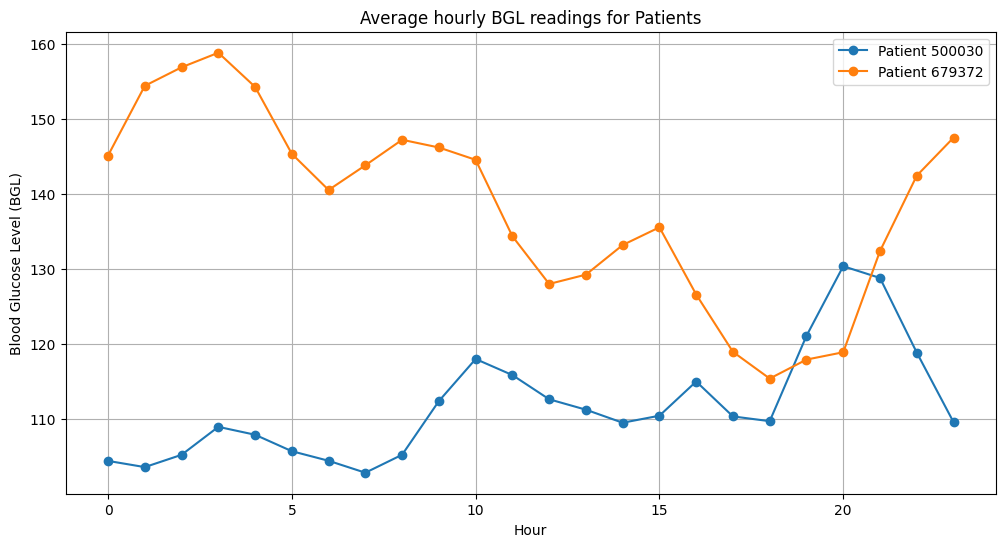

In [10]:

#Visualization 1: As someone that lives with a family member who is PWD. It is important for us to understand their hourly readings to have an idea of the overall trend.
#  This visualization allows us to do just that. It takes the average of all readings at a specific hour regardless of the minutes and date it was taken. While the simplest visualization in this analysis, it does allows 
#for both patients and doctors to understand their overall trend (eg. At what hour patients usually have peaks and how that/'s realated with other aspects of their lives)
# In this case we notice that, on average, Patient 679372 has BGL levels much higher than Patient 500030. We can also notice peaks at certain hours on average which can be further discussed in appointments between patient and physician, thus providing meaninful insights. 
plt.figure(figsize=(12, 6))

# Plot for Patient 1
plt.plot(patient_1_data['hour'], patient_1_data['bgl'], label=f'Patient {patient_1_id}', marker='o')

# Plot for Patient 2
plt.plot(patient_2_data['hour'], patient_2_data['bgl'], label=f'Patient {patient_2_id}', marker='o')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Blood Glucose Level (BGL)')
plt.title('Average hourly BGL readings for Patients')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [11]:
# We are now extracting the date (year,month,day) for the original date feature
def extract_date(date_str):
    # Split the string by spaces and take the date part
    date_part = date_str.split(' ')[0]
    return date_part
combined_df['date_only'] = combined_df['date'].apply(extract_date)

In [12]:
#The insuling_df allow us to have a summary of whether or not insulin was applied (at least once) at specific hour and date by ID. Notice that multiple readings may have been taken at certain hour 
#In this case we just to now if in at least in one of those readings insulin was applied
insulin_df = combined_df.groupby(['ID', 'hour', 'date_only'])['msg_type'].apply(lambda x: 'Yes' if 'DOSE_INSULIN' in x.values else 'No').reset_index()
insulin_df = insulin_df.rename(columns={'msg_type': 'Insulin'})


# The meal_df follows a similar logic allowing us to know if intervantion_snacks were given at least once at certain houur for a certain date for a specific ID
meal_df = combined_df.groupby(['ID', 'hour', 'date_only'])['msg_type'].apply(lambda x: 'Yes' if 'INTERVENTION_SNACK' in x.values else 'No').reset_index()
meal_df = meal_df.rename(columns={'msg_type': 'food'})

In [13]:
#The averaged df combines the average bgl reading for a specific date and hour per ID with the insulin_df and meal_df explained previously
averaged_df = combined_df.groupby(['ID', 'hour', 'date_only'])['bgl'].mean().reset_index()
averaged_df = pd.merge(averaged_df, insulin_df, on=['ID', 'hour', 'date_only'])
averaged_df = pd.merge(averaged_df, meal_df, on=['ID', 'hour', 'date_only'])
averaged_df


,ID,hour,date_only,bgl,Insulin,food
0,500030,0,2024-05-01,120.416667,No,No
1,500030,0,2024-05-02,98.916667,No,No
2,500030,0,2024-05-03,91.142857,No,Yes
3,500030,0,2024-05-04,70.916667,No,Yes
4,500030,0,2024-05-05,155.583333,No,No
...,...,...,...,...,...,...
4110,679372,23,2024-07-27,85.428571,No,Yes
4111,679372,23,2024-07-28,100.428571,No,Yes
4112,679372,23,2024-07-29,163.666667,No,No
4113,679372,23,2024-07-30,119.611111,No,No


In [14]:
import numpy as np
combined_df['food'] = np.where(
    combined_df['msg_type'] == 'INTERVENTION_SNACK', 
    'No', 
    'Yes'
)

In [15]:
def plot_bgl_vs_hour(df, id_value, date_value):
    # Filter DataFrame
    filtered_df = df[(df['ID'] == id_value) & (df['date_only'] == date_value)]

    # Plot BGL vs Hour with a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['hour'], filtered_df['bgl'], color='blue', marker='o', linestyle='-', label='BGL')

    # Highlight Insulin Administered
    insulin_df = filtered_df[filtered_df['Insulin'] == 'Yes']
    if not insulin_df.empty:
        plt.scatter(insulin_df['hour'], insulin_df['bgl'], color='red', label='Insulin Administered', s=150, edgecolor='black', zorder=5)

    # Highlight Insulin Administered
    insulin_df = filtered_df[filtered_df['food'] == 'Yes']
    if not insulin_df.empty:
        plt.scatter(insulin_df['hour'], insulin_df['bgl'], color='green', label='Food', s=50, edgecolor='black', zorder=5)

    # Add titles and labels
    plt.title(f'Average hourly BGL readings for Patient {id_value} on {date_value}')
    plt.xlabel('Hour')
    plt.ylabel('Blood Glucose Level')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

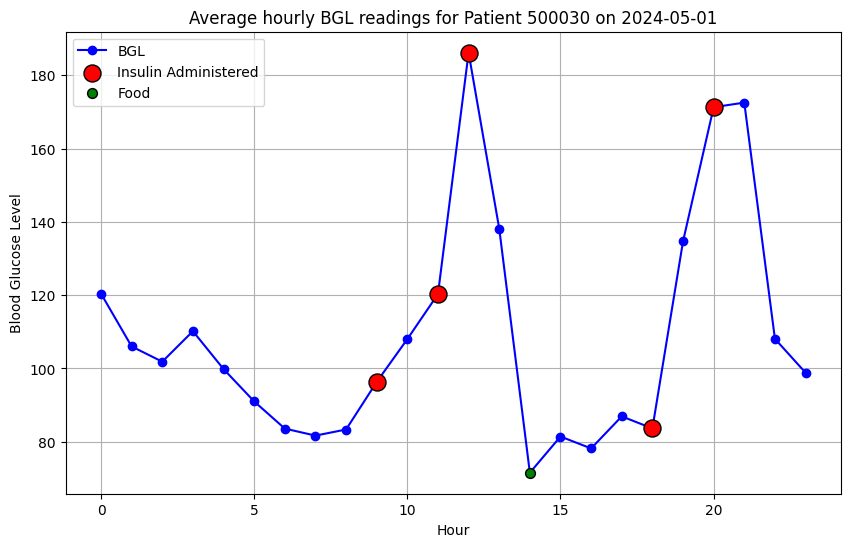

In [16]:
#Visualization 2: This visualization can be quite siginificant in cliical practice.
# Based on my experience living with someone with Diabetes, usually doctors would like to know on average what were the readings for specific dates. While Visualization 1 allowed us to look at a glance the average readings per hour overall, sometimes Doctors would like to know the readings for a specific date, specially if patients were not following their normal routine.
# This Visualization allows us to do just that. By passing a specific date and ID we can look at the average readings per hour from 0 (midnight) until 23 (11:00 pm). 
# The red dots indicate if insulin has been applied (at least once) in that hour based on msg_type and green dots indicate if intervention snack was required at least once at certain hour (also based on msg_type)
#Notice that the patient on 2024-05-01 has received at least one dose of insulin in hours 9 am, 11 am , 12 pm , 6 pm and 8 pm on 2024-05-01. It is also important to note that after hour 12:00 pm there was a significant drop in bgl requiring intervention_snack at 2pm
plot_bgl_vs_hour(averaged_df, '500030', date_value='2024-05-01')

In [17]:
def filter_dates(df, selected_date_only, selected_id):
    return (df
            .pipe(lambda x: x[(x['date_only'] == selected_date_only) & 
                               (x['msg_type'] == 'DOSE_INSULIN') &
                               (x['ID'] == selected_id)])
            .pipe(lambda x: x['date'].tolist())
           )

# Specify the date_only value you're interested in
selected_date_only = '2024-05-01'
selected_id = '500030'

# This prints to us the times for the graph above where Insulin was applied. Notice that Insulin was applied twice on hour 18:00. Because we only take average bgl readings per hour there is only one red dot on the graph above at hour 18:00. Regardless if insuline was taken twice
date_list = filter_dates(combined_df, selected_date_only, selected_id)

date_list

['2024-05-01 09:46:39.884000-05:00',
 '2024-05-01 11:18:11.771000-05:00',
 '2024-05-01 12:21:09.669000-05:00',
 '2024-05-01 18:34:32.548000-05:00',
 '2024-05-01 18:48:21.494000-05:00',
 '2024-05-01 20:29:30.010000-05:00']

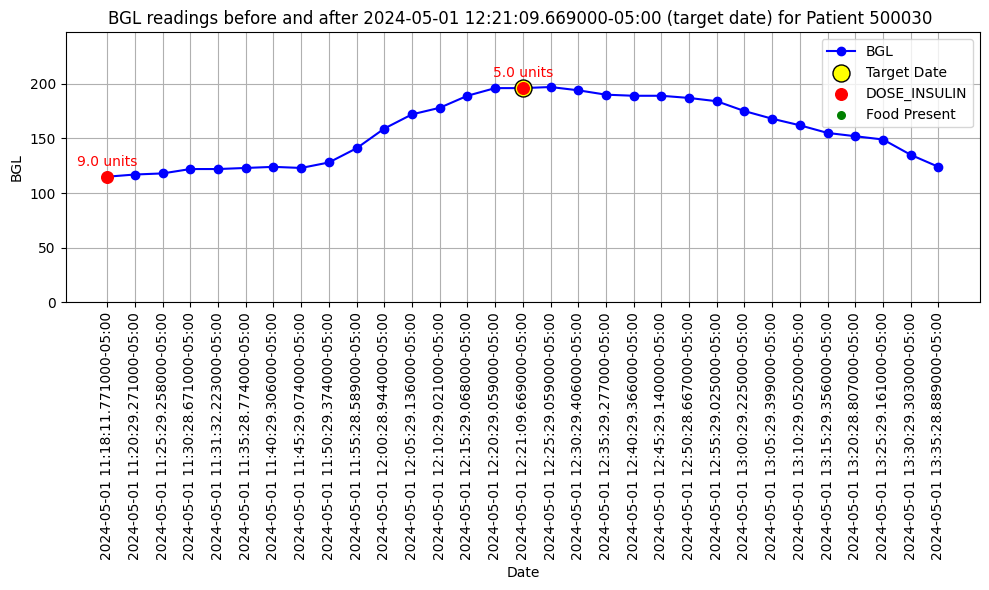

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to get values around a specified date
def get_values_around_date(df, target_date, selected_id, window_size=15):
    # Filter the DataFrame by ID and target_date as strings
    df_filtered = df[(df['ID'] == selected_id) & (df['date'] == target_date)]
    
    if not df_filtered.empty:
        df_sorted = df[df['ID'] == selected_id].sort_values('date')
        
    
        target_position = df_sorted[df_sorted['date'] == target_date].index
        
        if not target_position.empty:
            target_position = target_position[0]
            # Calculate the start and end positions
            start_idx = max(target_position - window_size, 0)
            end_idx = min(target_position + window_size + 1, len(df_sorted))
            
            # Slice the DataFrame
            df_slice = df_sorted.iloc[start_idx:end_idx]
            
            return df_slice
        else:
            raise ValueError(f"Date {target_date} not found in the DataFrame.")
    else:
        raise ValueError(f"Date {target_date} not found for ID {selected_id}.")

# Specify the target date and ID
target_date = '2024-05-01 12:21:09.669000-05:00'
selected_id = '500030'

# Get the values
df_result = get_values_around_date(combined_df, target_date, selected_id)

# Plot bgl vs date
plt.figure(figsize=(10, 6))
plt.plot(df_result['date'], df_result['bgl'], marker='o', linestyle='-', color='b', label='BGL')

# Highlight the target date in yellow
highlight = df_result[df_result['date'] == target_date]
plt.scatter(highlight['date'], highlight['bgl'], color='yellow', zorder=5, edgecolor='black', s=150, label='Target Date')

# Highlight points with DOSE_INSULIN in red
insulin_df = df_result[df_result['msg_type'] == 'DOSE_INSULIN']
plt.scatter(insulin_df['date'], insulin_df['bgl'], color='red', zorder=5, label='DOSE_INSULIN', s = 70)
# Add dose_units as annotations on red dots (DOSE_INSULIN)
for i, row in insulin_df.iterrows():
    plt.text(row['date'], row['bgl'] + 10, f"{row['dose_units']} units", color='red', ha='center')

# Highlight points where food is Yes in green
food_df = df_result[df_result['msg_type'] == 'INTERVENTION_SNACK']
plt.scatter(food_df['date'], food_df['bgl'] -100, color='green', zorder=5, label='Food Present', s = 30)


#This allows for the dose units to be seen in graph by increasing y-axis range
max_bgl = df_result['bgl'].max()
plt.ylim([0, max_bgl + 50])

plt.xlabel('Date')
plt.ylabel('BGL')
plt.title(f'BGL readings before and after {target_date} (target date) for Patient {selected_id} ')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


#Visualization 3: This visualization goes a step further. Now that we know the specific timestamps insulin was applied we can use this information to look deeper in the date. Instead of looking at the hourly average, we can put in as a paremeter a date were insulin was applied and get the 15 readings before and 15 readings after
# The yellow dot represents the target date we entered while the red dot represents where insulin was applied and the green dot represents whether intervention snack was needed.
# Going back to the example of 2024-05-01  for patient 500030, in this case we can see 2 insulin doses: one at 11:18 am and another at 12:21 pm which were represented before as Insulin in hour 11 and hour 12 in visualization 2. This new visualization allows us to see exactly the time between insulin dosages and if they had any effect in the short term
#Since we are not dealing with hourly averages anymore, the dosage units of insulin was also added (in red). This can be extremely useful if Doctors are still adjusting the dosage for patients
# Notice that in this snapshot of the data from Visualization #2 no interventional snack was needed from the time between 11:18 and 13:35

In [ ]:
# Overall, visualizations 1, 2, and 3 work together to give a better undertanding of readings for both Patients and Doctors. 
# Visualization #1 allows us to get a look at the average hourly readings per patient overall
# Visualization #2 dives a little deeper looking at average hourly readings for a specific date and indicates when insulin has been applied (at least once in a specific hour window)
#Lastly visualization #3 allows us to zoom in at a specific time (date, hour and minutes) Insulin was applied looking the 15 readings before and after. This allows for the actual readings to be looked at and also allows for us to see the dosage that was applied of insulin at a specific time

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. Besides insulin some patients may be taking other medications for their Diabetes. With this, would it be intersting for those additional information to be accounted for in visualizations? How would other medications impact daily bgl readings of patients compared to those just on Insulin?
2. Multiple readings were taken in very short timeframes with 2-5 min between readings in some cases. What type of device was used for the readings? If the readings were taken through devices such as Libre 2, is it possible to know if the readings were within the error margin of 20% to determine the accuracy of the readings?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`